In [1]:
#初始化
def yuanshi(dakai,canshu1):#canshu1是定义的参数
    lanmda=canshu1[0]/100
    sanjiao=canshu1[1]/100
#     print('参数是:',lanmda,sanjiao)
    import xlrd
    import networkx as nx
    import sys
    import matplotlib.pyplot as plt

    G=nx.Graph()
    G_test=nx.DiGraph()
    N_cishu=[]
    K=0
    chushi=1    
    time=0
    name_node_str=[]
    name_node_int=[]
    name_node_num=0

    time_max=0


    #这个操作就是把真实数据到了进来

    dakai=str(dakai)
    # book=xlrd.open_workbook('E:\\SCI\\仿照参考\\code\\London-data\\'+str(dakai)+'.xlsx')
    book=xlrd.open_workbook('E:\\SCI\\仿照参考\\code\\data_duibi\\'+dakai+'.edges.xls')
    # sheet=book.sheet_by_name(str(dakai))'
    sheet=book.sheet_by_name(dakai+'.edges')


    for i in range(1,sheet.nrows):
        for j in range(2):
            if(sheet.cell(i,0).value.split(' ')[j] not in name_node_str):
                name_node_str.append(sheet.cell(i,0).value.split(' ')[j])
                name_node_num+=1
                name_node_int.append(name_node_num)


    for i in range(1,sheet.nrows):
            G.add_edge(name_node_str.index((sheet.cell(i,0).value.split(' ')[0])),name_node_str.index(sheet.cell(i,0).value.split(' ')[1]),weight=1)
    #         print(name_node_str.index((sheet.cell(i,0).value)),name_node_str.index((sheet.cell(i,1).value)))
    num_node=len(G.nodes())        
    num_edge=len(G.edges())
    lishu=[-1]*num_node
    #初始化 N-次数矩阵
    import sys
    f=open(r"E:\SCI\仿照参考\code\data_duibi\\"+dakai+".circles.txt",'r')
    lines=f.readlines()

    circle=[]
    for i in range(len(lines)):
        circle.append([])
        for j in range(1,len(lines[i].split('\t'))):
            try:
                circle[i].append(name_node_str.index(str((int(lines[i].split('\t')[j])))))
            except:
                a=0
        if(circle[i]==[]):
            del circle[i]
    import random
    import operator

    K=len(circle)#粒子数量
    node_list=list(G.nodes())

    lizi=[]
    for i in range(K):
        lizi.append(random.sample(G.nodes(),1)[0])

    N_cishu=[]
    for i in G:
        N_cishu.append([1]*K)
#     print(N_cishu)


    #初始化能量矩阵
    E=[]
    for i in range(K):
        E.append([0.5])
        for j in G:
            E[i].append(0.5)
#     sanjiao=0.3
    t_c=[0]*K

    t=0
    # for i in range(K):
    #     N_cishu[lizi[i]][t]+=1
    # #     print(i,t,lizi[i])
    #     t+=1
    length=list(nx.shortest_path_length(G))
    lishu=[-1]*num_node
    for i in range(num_node):#这里判断各个点的隶属情况
        lishu[i]=N_cishu[i].index(max(N_cishu[i]))   
    print('初始化完成')
    
    #开始遍历
    import tqdm
    time_max=len(G)*10
    num_node=G.number_of_nodes() 
    #两种情况 若lishu没有 则新建 如果已经有了 就添加
    lishu_num=len(lishu)
    lishu=[-1]*num_node
    # while((time<time_max) or (bianliquan==1)):小的用这个
    for time in range(time_max):
        bianliquan=0#bianliquan=1的时候说明还有没有遍历到的点，会导致隶属判断出错
    #     time+=1
        lizi_t_1=[-1]*K
        for k in range(len(lizi)):#当前算第k个粒子
            rand_pref=[]
            for j in nei(lizi[k],G,length,K):#j是粒子邻居
                rand_pref.append((1-lanmda)*rand(lizi[k],j,G)+lanmda*pref(lizi[k],j,k,G,length,K,N_cishu))
            lizi_t_1[k]=lizi[k]
    #         print(k,lizi[k])
            if(len(nei(lizi[k],G,length,K))>0):
                lizi[k]=rand_pick(nei(lizi[k],G,length,K),rand_pref)


            if ((lishu[lizi[k]]==lishu[lizi_t_1[k]])):
                E[k][lizi[k]]=E[k][lizi[k]]+sanjiao
    #             print(k,lizi[k],E[k][lizi[k]],'+++')
            else:
                E[k][lizi[k]]-=sanjiao
    #             print(k,lizi[k],E[k][lizi[k]],'---')
    #             print(node_color[lizi[k]],node_color[lizi_t_1[k]],k,lizi,lizi_t_1)
            if(E[k][lizi[k]]>1):
                E[k][lizi[k]]=1
            elif(E[k][lizi[k]]<0):
    #             print(lizi[k],E_best(k))#这个是显示粒子回家的
                E[k][lizi[k]]=0  
                lizi[k]=E_best(k,E)
            N_cishu[lizi[k]][k]+=1
        for i in range(num_node):#这里判断各个点的隶属情况
            lishu[i]=N_cishu[i].index(max(N_cishu[i]))
        for i in range(len(N_cishu)):
            if(len(set(N_cishu[i]))==1):
                lishu[i]=0
                bianliquan=1
        if(bianliquan==1):
            time_max+=1

#         if(time>2*time_max):
#             break
    # print(lishu)
    # print(len(set(lishu)),'社区数量')
    return G,lishu,pingjia(lishu,K,circle)

In [2]:
# yuanshi(613313)

In [31]:
def pingjia(lishu,K,circle):
    quan=[]
    for i in range(K):
        quan.append([])
    for i in range(len(lishu)):
        quan[lishu[i]].append(i)
    av_zhunque=0
    av_jingque=0
    av_zhaohui=0
    av_ber=0
    av_f1=0
    for i in range(K):#这个是第i个真实圈子结果
        r_zhunque=0
        r_jingque=0
        r_zhaohui=0
        r_ber=0
        r_f1=0
        for j in range(K):#这是quan的第j个quan
            tp=0#在这种排列下 初始化
            fn=0
            fp=0
            tn=0
            ber=0
            for rn in circle[i]:
                if(rn in quan[j]):
                    tp+=1
                else:
                    fn+=1
            fp+=(len(quan[j])-tp)
            tn=len(lishu)-fp
            if(tp!=0):
                try:
                    zhunque=(tp+tn)/(tp+tn+fp+fn)
                    jingque=tp/(tp+fp)
                    zhaohui=tp/(tp+fn)
                    ber=0.5*((fp/(tp+fp))+(fn/(tp+fn)))
                    f1=2/(1/(zhunque)+(1/zhaohui))
                except:
                    print('tptptp',tp)
                if(zhunque>1):
                    print(circle[i],quan[j])
                if(f1>r_f1):
                    r_jingque=jingque
                    r_zhunque=zhunque
                    r_zhaohui=zhaohui
                    r_ber=ber
                    r_f1=f1
        av_f1+=r_f1
        av_ber+=r_ber
        av_zhaohui+=r_zhaohui
        av_zhunque+=r_zhunque
        av_jingque+=r_jingque
    av_zhaohui=av_zhaohui/K
    av_f1=av_f1/K
    av_ber=av_ber/K
    av_zhunque=av_zhunque/K
    av_jingque=av_jingque/K
#     print('f1分数----',av_f1)
#     print('准确率',av_zhunque)
#     print('召回率',av_zhaohui)
    return [av_f1,av_zhunque,av_zhaohui,av_ber]

In [28]:
#上面那个写的不好 时间复杂大
#写了个邻居节点的函数，返回0项是邻居节点，返回1项是度中心性

def nei(n,G,length,K):
    neibor=[]
    for target in G:
        try:
            if (length[n][1][target]==1):
                neibor.append(target)
        except:
            continue

    return neibor
def Jaccard(d1,d2,G,length,K):
    d1_nei=nei(d1,G,length,K)
    d2_nei=nei(d2,G,length,K)
    if(set(d1_nei).union(set(d2_nei))):
        return len(set(d1_nei).intersection(set(d2_nei)))/len(set(d1_nei).union(set(d2_nei)))
    else:
        return 0
def Jaccard_list(d,l,G,length,K):
    sum_j=0
    len_l=len(l)
    for i in range(len_l):
        sum_j+=Jaccard(d,l[i],G,length,K)
    return sum_j/len_l

In [5]:
#优先转移矩阵 随机游走矩阵
def rand(i,j,G):
    return 1/G.degree(i)

def pref(i,j,k,G,length,K,N_cishu):#这个是 第k个粒子在第i个节点邻居节点j的 优先转移的概率 
    num_kong=0
    for j_t in nei(i,G,length,K):#邻接节点
        a=N_kong(j_t,K,N_cishu)
        num_kong+=a[0][k]
    return N_kong(j,K,N_cishu)[0][k]/num_kong

def N_kong(i,K,N_cishu):
    N_kong=[]
    total_N=0
    for k in range(K):
        total_N+=N_cishu[i][k]
    for k in range(K):
        N_kong.append(N_cishu[i][k]/total_N)
    return N_kong,total_N#返回两个量 第一个是控制矩阵，当前粒子访问节点i的相对频率，第二个是节点i被访问的总次数

In [6]:
import random#这是一个按照概率选取数字的函数
def rand_pick(seq, probabilities):
    rand_pick_x = random.uniform(0, 1)
    cumprob =0.0
    for item , item_pro in zip(seq, probabilities):
        cumprob += item_pro
#         print(seq,probabilities)
        if (rand_pick_x < cumprob):
            break
    return item

# value_list = [0 , 1, 2]
# probabilities = [0.8 , 0.1, 0.1]
# for i in range(10):
#     print(rand_pick(value_list, probabilities))

In [7]:
rand_pick([1,2,3,4],[0.1,0.1,0.1,0.4])

4

In [8]:
#现在要设置一个能量变量
def E_test(k,j,lizi_t_1):  
    test=0
    if (node_color[lizi[k]]=='#00BFFF' and node_color[lizi_t_1]=='b')or(node_color[lizi[k]]=='#00FF00' and node_color[lizi_t_1]=='g'):
        E[k][j]+=sanjiao
    else:
        E[k][j]-=sanjiao
    if(E[k][j]>1):
        E[k][j]=1
    elif(E[k][j]<0):
        E[k][j]=1
        test=1
        print(k,j)
    return test
#选出了那个第k个粒子能量最大的点        
def E_best(k,E):
    return(E[k].index(max(E[k])))
# def color_test(k,lizi_t_1):
#     return(node_color[lizi[k]]=='b' and node_color[lizi_t_1[k]]=='#ADD8E6')or(node_color[lizi[k]]=='g' and node_color[lizi_t_1[k]]=='#90EE90')
def color_test(k,lizi_t_1):
    return(node_color[lizi[k]]==node_color[lizi_t_1[k]])or(node_color[lizi[k]]==node_color[lizi_t_1[k]])

In [9]:
#这个是计算粒子控制矩阵赋值的参数情况
def kzjz(lz,lishu,lizi):#lz属于lizi 
    num_fanwei=1#lz这个粒子占据的范围
    for i in range(len(lishu)):
        if(lishu[i]==lizi.index(lz)):
            num_fanwei+=1
    return num_fanwei/len(lishu)

In [10]:
G,lishu,pj=yuanshi(7424642)

TypeError: yuanshi() missing 1 required positional argument: 'canshu1'

In [29]:
cir=[]
nodelist=list(G.nodes())
ncir=len(lishu)
for i in range(max(lishu)+1):
    cir.append([])
for i in range(ncir):
    cir[(lishu[i])].append(i)

In [54]:
pj[0]

0.6221445385539311

In [90]:
import numpy as np
import matplotlib.pyplot as plt
import xlwt#写入文件
import tqdm
import xlrd
import networkx as nx
import sys
# shuju=14618160 
dakai_2=[819800,9298152,13317162,7670202,5471892,12771872,14528221,7888452,612473,13274152,629864,15773532]
best_canshu=[]
for shuju in dakai_2:
    print(shuju)
    sjj=0
    class PSO(object):
        def __init__(self, population_size, max_steps):
            self.w = 0.6  # 惯性权重
            self.c1 = self.c2 = 2
            self.population_size = population_size  # 粒子群数量
            self.dim = 2  # 搜索空间的维度
            self.max_steps = max_steps  # 迭代次数
            self.x_bound = [1,100]  # 解空间范围
            self.x = np.random.uniform(self.x_bound[0], self.x_bound[1],
                                       (self.population_size, self.dim))  # 初始化粒子群位置
            self.v = np.random.rand(self.population_size, self.dim)  # 初始化粒子群速度
            fitness = self.calculate_fitness(self.x)
            self.p = self.x  # 个体的最佳位置
            self.pg = self.x[np.argmin(fitness)]  # 全局最佳位置
            self.individual_best_fitness = fitness  # 个体的最优适应度
            self.global_best_fitness = np.max(fitness)  # 全局最佳适应度

        def calculate_fitness(self,x):
            shuchu=[]
            for i in range(len(x)):
                if(x[i][0]<20):
                    x[i][0]=20
                elif(x[i][0]>80):
                    x[i][0]=80
                if(x[i][1]<10):
                    x[i][1]=10
                elif(x[i][1]>40):
                    x[i][1]=40
                shuchu.append(yuanshi(shuju,x[i])[2][0]*100)
            return np.array(shuchu)

        def evolve(self):
    #         fig = plt.figure()
            for step in range(self.max_steps):
                r1 = np.random.rand(self.population_size, self.dim)
                r2 = np.random.rand(self.population_size, self.dim)
                # 更新速度和权重
                self.v = self.w*self.v+self.c1*r1*(self.p-self.x)+self.c2*r2*(self.pg-self.x)
                self.x = self.v + self.x
    #             plt.clf()
    #             plt.scatter(self.x[:, 0], self.x[:, 1], s=30, color='k')
    #             plt.xlim(self.x_bound[0], self.x_bound[1])
    #             plt.ylim(self.x_bound[0], self.x_bound[1])
    #             plt.pause(0.01)
                fitness = self.calculate_fitness(self.x)
                # 需要更新的个体
                update_id = np.greater(fitness,self.individual_best_fitness)
                self.p[update_id] = self.x[update_id]
    #             print(fitness,'前面的',update_id)
                self.individual_best_fitness[update_id] = fitness[update_id]
                # 新一代出现了更小的fitness，所以更新全局最优fitness和位置
                if np.max(fitness) > self.global_best_fitness:
                    self.pg = self.x[np.argmin(fitness)]
                    self.global_best_fitness = np.max(fitness)
                print('best fitness: %.5f, mean fitness: %.5f' % (self.global_best_fitness, np.mean(fitness)))
            return self.pg
    try:
        pso = PSO(5,20)
        best_canshu.append(pso.evolve())
        sjj+=1
    except:
        print('损坏',shuju)
# plt.show()

819800
best fitness: 55.17412, mean fitness: 46.61534
best fitness: 55.55856, mean fitness: 47.03210
best fitness: 55.55856, mean fitness: 49.14386
best fitness: 55.55856, mean fitness: 49.42753
best fitness: 55.55856, mean fitness: 48.59694
best fitness: 55.55856, mean fitness: 48.07179
best fitness: 55.55856, mean fitness: 48.71520
best fitness: 55.55856, mean fitness: 46.70571
best fitness: 55.55856, mean fitness: 48.32525
best fitness: 55.55856, mean fitness: 47.63568
best fitness: 55.55856, mean fitness: 47.74559
best fitness: 55.55856, mean fitness: 49.56402
best fitness: 55.55856, mean fitness: 45.51118
best fitness: 55.55856, mean fitness: 49.60159
best fitness: 55.55856, mean fitness: 48.37790
best fitness: 55.55856, mean fitness: 47.77402
best fitness: 55.55856, mean fitness: 46.39387
best fitness: 56.37253, mean fitness: 45.93722
best fitness: 56.37253, mean fitness: 49.15325
best fitness: 56.37253, mean fitness: 47.46190
9298152
best fitness: 63.96449, mean fitness: 59.2360

In [91]:
for i in range(7):
    try:
        sum_f1=0
        sum_ber=0
        for j in range(10):
            print('f1',yuanshi(dakai_2[i],best_canshu[i])[2][0])
   
            print('ber',yuanshi(dakai_2[i],best_canshu[i])[2][-1])
        print(dakai[i],sum_f1,sum_ber)
    except:
        print(dakai[i])

f1 0.5116376122366422
ber 0.7112095125406485
f1 0.4080502881088318
ber 0.6989953580901856
f1 0.5227447151483261
ber 0.6733164099768298
5471892
7670202
13317162
9298152
819800
686
414


In [92]:
dakai_2

[819800,
 9298152,
 13317162,
 7670202,
 5471892,
 12771872,
 14528221,
 7888452,
 612473,
 13274152,
 629864,
 15773532]

In [93]:
best_canshu

[array([77.62891287, 38.16350932]),
 array([20.       , 15.0955483]),
 array([52.17687096, 40.        ]),
 array([20.12162803, 36.67084674]),
 array([20.25586667, 38.59341959]),
 array([76.79840946, 16.87676978]),
 array([20.       , 35.8187756]),
 array([39.61383898, 40.        ]),
 array([58.38033078, 12.67495605]),
 array([20.2418525, 40.       ]),
 array([20.        , 19.03051909])]

In [46]:
part_sj=[]#随机竞争学习的隶属关系 part形式
part_sjjz={}
for i in range(len(cir)):
    shuyu=[i]*len(cir[i])
    part_sj.append(dict(zip(cir[i],shuyu)))
    part_sjjz.update(part_sj[i])
mod = community.modularity(part_sjjz,G)
mod

-0.011888331447334852

In [73]:
import os
name=[]
test_name = os.listdir('data_duibi')
for temp in test_name:
    if(str(temp)[-1]=='t'):
        name.append(temp.split('.')[0])
name=list(set(name))

In [69]:
import xlwt#写入文件
import tqdm
workbook = xlwt.Workbook(encoding = 'ascii')
worksheet = workbook.add_sheet('My Worksheet')
i=0

for dakai in name:
    try:
        ga=gaijin(dakai)
        worksheet.write(i,0,label =ga[0])
        worksheet.write(i,1,label =ga[1])
        worksheet.write(i,2,label =ga[2])
        worksheet.write(i,3,label =ga[3])
        yu=yuanshi(dakai)
        worksheet.write(i,5,label =yu[0])
        worksheet.write(i,6,label =yu[1])
        worksheet.write(i,7,label =yu[2])
        worksheet.write(i,8,label =yu[3])
        worksheet.write(i,10,label =dakai)
        i+=1
    except:
        print(dakai)
workbook.save('gaijin2.xlsx')

初始化完成
f1分数---- 0.5736558133300547
准确率 0.7424058223117911
召回率 0.4839538239538239
初始化完成
f1分数---- 0.5365447538469403
准确率 0.702774320900503
召回率 0.4638383838383838
初始化完成
f1分数---- 0.5492194307285769
准确率 0.6360657133129043
召回率 0.48484848484848486
初始化完成
f1分数---- 0.584917139343114
准确率 0.799923391215526
召回率 0.4713804713804714
初始化完成
f1分数---- 0.5444604850562997
准确率 0.7888030680515005
召回率 0.43415479399306894
初始化完成
f1分数---- 0.5858003197896718
准确率 0.833562895075741
召回率 0.46149403157489405
初始化完成
f1分数---- 0.6594673494951876
准确率 0.787222212720598
召回率 0.5811507936507936
初始化完成
f1分数---- 0.5825016479847137
准确率 0.7895334370012349
召回率 0.4853174603174602
初始化完成
f1分数---- 0.5460952485354847
准确率 0.7411680709124745
召回率 0.48254836224761044
初始化完成
f1分数---- 0.5386129999328098
准确率 0.7155096944364251
召回率 0.48574086731981464
初始化完成
f1分数---- 0.4899908564357195
准确率 0.8014875043176435
召回率 0.38131168214501554
初始化完成
f1分数---- 0.501875995650562
准确率 0.8320821774956767
召回率 0.3627202427202427
初始化完成
f1分数---- 0.741508435664736
准确率 0.8

In [74]:
import xlwt#写入文件
import tqdm
workbook = xlwt.Workbook(encoding = 'ascii')
worksheet = workbook.add_sheet('My Worksheet')
i=0

for dakai in name:
    try:
        ga=gaijin(dakai)
        worksheet.write(i,0,label =ga[0])
        worksheet.write(i,1,label =ga[1])
        worksheet.write(i,2,label =ga[2])
        worksheet.write(i,3,label =ga[3])
        yu=yuanshi(dakai)
        worksheet.write(i,5,label =yu[0])
        worksheet.write(i,6,label =yu[1])
        worksheet.write(i,7,label =yu[2])
        worksheet.write(i,8,label =yu[3])
        worksheet.write(i,10,label =dakai)
        i+=1
    except:
        print(dakai)
workbook.save('gaijin3.xlsx')

初始化完成
2029971
629863
819800
初始化完成
f1分数---- 0.6473438269617334
准确率 0.7726127558170629
召回率 0.60501443001443
初始化完成
f1分数---- 0.5889568209418681
准确率 0.8674559722404315
召回率 0.47251082251082244
初始化完成
f1分数---- 0.6154392508341971
准确率 0.7491752225494932
召回率 0.5472802197802198
初始化完成
f1分数---- 0.567614372904027
准确率 0.8035579895991274
召回率 0.48718253968253966
初始化完成
f1分数---- 0.6309325436742392
准确率 0.6837679016283323
召回率 0.639069264069264
初始化完成
f1分数---- 0.5419631196975424
准确率 0.7243574603105567
召回率 0.4464285714285714
初始化完成
f1分数---- 0.639675697334188
准确率 0.853328594732029
召回率 0.5318045245669849
初始化完成
f1分数---- 0.5950094700065004
准确率 0.8192386308428381
召回率 0.5122410745846588
745823


In [70]:
i

42

In [68]:
gaijin(10985532)

初始化完成
f1分数---- 0.6959836730556495
准确率 0.8643065109831178
召回率 0.5975787284610814


[0.6959836730556495,
 0.8643065109831178,
 0.5975787284610814,
 0.5624295798688381]

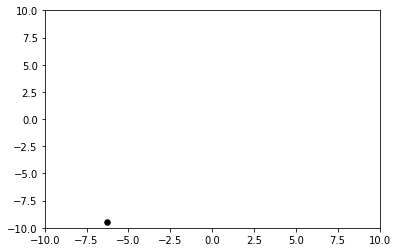

<class 'numpy.ndarray'> [129.78567029] 前面的 [ True]
best fitness: 129.78567, mean fitness: 129.78567


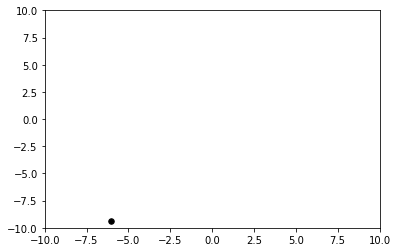

<class 'numpy.ndarray'> [124.68079801] 前面的 [ True]
best fitness: 124.68080, mean fitness: 124.68080


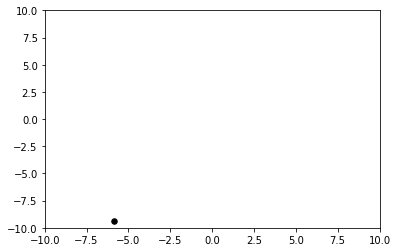

<class 'numpy.ndarray'> [121.69236586] 前面的 [ True]
best fitness: 121.69237, mean fitness: 121.69237


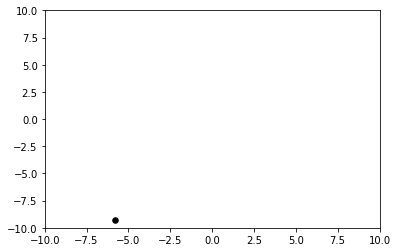

<class 'numpy.ndarray'> [119.92612341] 前面的 [ True]
best fitness: 119.92612, mean fitness: 119.92612


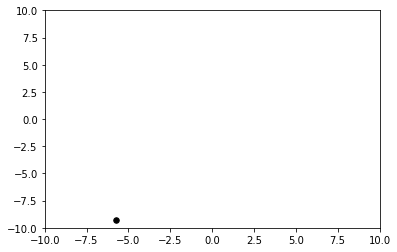

<class 'numpy.ndarray'> [118.876032] 前面的 [ True]
best fitness: 118.87603, mean fitness: 118.87603


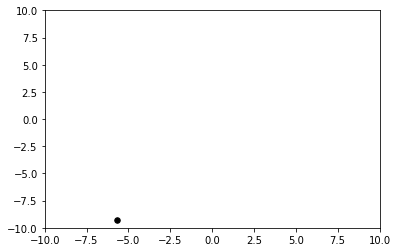

<class 'numpy.ndarray'> [118.24945262] 前面的 [ True]
best fitness: 118.24945, mean fitness: 118.24945


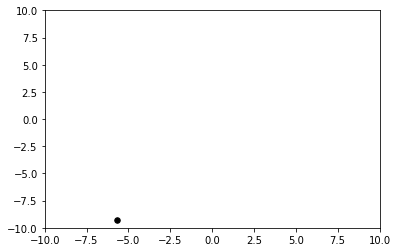

<class 'numpy.ndarray'> [117.87475616] 前面的 [ True]
best fitness: 117.87476, mean fitness: 117.87476


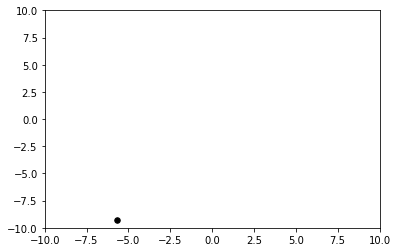

<class 'numpy.ndarray'> [117.6503887] 前面的 [ True]
best fitness: 117.65039, mean fitness: 117.65039


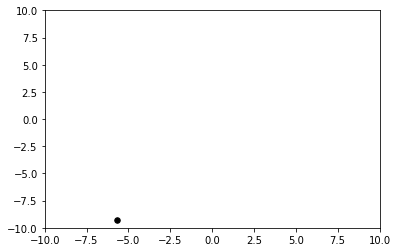

<class 'numpy.ndarray'> [117.51593038] 前面的 [ True]
best fitness: 117.51593, mean fitness: 117.51593


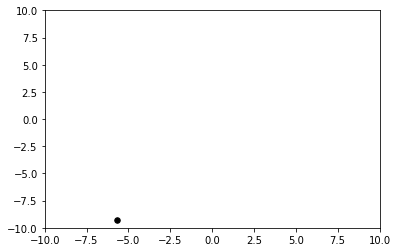

<class 'numpy.ndarray'> [117.43531376] 前面的 [ True]
best fitness: 117.43531, mean fitness: 117.43531


In [27]:
import numpy as np
import matplotlib.pyplot as plt
 
 
class PSO(object):
    def __init__(self, population_size, max_steps):
        self.w = 0.6  # 惯性权重
        self.c1 = self.c2 = 2
        self.population_size = population_size  # 粒子群数量
        self.dim = 2  # 搜索空间的维度
        self.max_steps = max_steps  # 迭代次数
        self.x_bound = [-10, 10]  # 解空间范围
        self.x = np.random.uniform(self.x_bound[0], self.x_bound[1],
                                   (self.population_size, self.dim))  # 初始化粒子群位置
        self.v = np.random.rand(self.population_size, self.dim)  # 初始化粒子群速度
        fitness = self.calculate_fitness(self.x)
        self.p = self.x  # 个体的最佳位置
        self.pg = self.x[np.argmin(fitness)]  # 全局最佳位置
        self.individual_best_fitness = fitness  # 个体的最优适应度
        self.global_best_fitness = np.max(fitness)  # 全局最佳适应度
 
    def calculate_fitness(self, x):
        return np.sum(np.square(x), axis=1)
 
    def evolve(self):
        fig = plt.figure()
        for step in range(self.max_steps):
            r1 = np.random.rand(self.population_size, self.dim)
            r2 = np.random.rand(self.population_size, self.dim)
            # 更新速度和权重
            self.v = self.w*self.v+self.c1*r1*(self.p-self.x)+self.c2*r2*(self.pg-self.x)
            self.x = self.v + self.x
            plt.clf()
            plt.scatter(self.x[:, 0], self.x[:, 1], s=30, color='k')
            plt.xlim(self.x_bound[0], self.x_bound[1])
            plt.ylim(self.x_bound[0], self.x_bound[1])
            plt.pause(0.01)
            fitness = self.calculate_fitness(self.x)
            # 需要更新的个体
            update_id = np.greater(self.individual_best_fitness, fitness)
            self.p[update_id] = self.x[update_id]
            self.individual_best_fitness[update_id] = fitness[update_id]
            print(type(fitness),fitness[update_id],'前面的',update_id)
            # 新一代出现了更小的fitness，所以更新全局最优fitness和位置
            if np.min(fitness) < self.global_best_fitness:
                self.pg = self.x[np.argmin(fitness)]
                self.global_best_fitness = np.min(fitness)
            print('best fitness: %.5f, mean fitness: %.5f' % (self.global_best_fitness, np.mean(fitness)))
 
 
pso = PSO(1, 10)
pso.evolve()
plt.show()

In [26]:
#初始化
def yuanshi(dakai,canshu1):#canshu1是定义的参数

    lanmda=canshu1[0]/100
    sanjiao=canshu1[1]/100
#     print('参数是:',lanmda,sanjiao)


    G=nx.Graph()
    G_test=nx.DiGraph()
    N_cishu=[]
    K=0
    chushi=1    
    time=0
    name_node_str=[]
    name_node_int=[]
    name_node_num=0

    time_max=0


    #这个操作就是把真实数据到了进来

    dakai=str(dakai)
    # book=xlrd.open_workbook('E:\\SCI\\仿照参考\\code\\London-data\\'+str(dakai)+'.xlsx')
    book=xlrd.open_workbook('E:\\SCI\\仿照参考\\code\\data_duibi\\'+dakai+'.edges.xls')
    # sheet=book.sheet_by_name(str(dakai))'
    sheet=book.sheet_by_name(dakai+'.edges')


    for i in range(1,sheet.nrows):
        for j in range(2):
            if(sheet.cell(i,0).value.split(' ')[j] not in name_node_str):
                name_node_str.append(sheet.cell(i,0).value.split(' ')[j])
                name_node_num+=1
                name_node_int.append(name_node_num)


    for i in range(1,sheet.nrows):
            G.add_edge(name_node_str.index((sheet.cell(i,0).value.split(' ')[0])),
                       name_node_str.index(sheet.cell(i,0).value.split(' ')[1]),weight=1)
#             print(name_node_str.index((sheet.cell(i,0).value)),name_node_str.index((sheet.cell(i,1).value)))
    num_node=len(G.nodes())        
    num_edge=len(G.edges())
    lishu=[-1]*num_node
    #初始化 N-次数矩阵
    import sys
    f=open(r"E:\SCI\仿照参考\code\data_duibi\\"+dakai+".circles.txt",'r')
    lines=f.readlines()

    circle=[]
    for i in range(len(lines)):
        circle.append([])
        for j in range(1,len(lines[i].split('\t'))):
            try:
                circle[i].append(name_node_str.index(str((int(lines[i].split('\t')[j])))))
            except:
                a=0
        if(circle[i]==[]):
            del circle[i]
    import random
    import operator

    K=len(circle)#粒子数量
    node_list=list(G.nodes())

    node_degree=(list(G.nodes()))
    node_degree.sort(key=lambda x:G.degree(x), reverse=True)
    lizi=[node_degree[0]]
    length=list(nx.shortest_path_length(G))
    for i in range(1,K):
        for j in range(len(node_degree)):
            if(node_degree[j] in lizi):
                continue
            j_v=1
            houbu=node_degree[-1]
            jlj=Jaccard_list(node_degree[j],lizi,G,length,K)
            if(jlj<j_v):
                j_v=jlj
                houbu=node_degree[j]
        lizi.append(houbu)

#     lizi=[]
#     for i in range(K):
#         lizi=(G.nodes())
# #         lizi.append(random.sample(G.nodes(),1)[0])

    N_cishu=[]
    for i in G:
        N_cishu.append([1]*K)
#     print(N_cishu)


    #初始化能量矩阵
    E=[]
    for i in range(K):
        E.append([0.5])
        for j in G:
            E[i].append(0.5)
#     sanjiao=0.3
    t_c=[0]*K

    t=0
    # for i in range(K):
    #     N_cishu[lizi[i]][t]+=1
    # #     print(i,t,lizi[i])
    #     t+=1
    length=list(nx.shortest_path_length(G))
    lishu=[-1]*num_node
    for i in range(num_node):#这里判断各个点的隶属情况
        lishu[i]=N_cishu[i].index(max(N_cishu[i]))   
#     print('初始化完成')
    
    #开始遍历
    time_max=len(G)*3
    num_node=G.number_of_nodes() 
    #两种情况 若lishu没有 则新建 如果已经有了 就添加
    lishu_num=len(lishu)
    lishu=[-1]*num_node
    # while((time<time_max) or (bianliquan==1)):小的用这个
    for time in range(time_max):
        bianliquan=0#bianliquan=1的时候说明还有没有遍历到的点，会导致隶属判断出错
    #     time+=1
        lizi_t_1=[-1]*K
        for k in range(len(lizi)):#当前算第k个粒子
            rand_pref=[]
            for j in nei(lizi[k],G,length,K):#j是粒子邻居
                rand_pref.append((1-lanmda)*rand(lizi[k],j,G)+lanmda*pref(lizi[k],j,k,G,length,K,N_cishu))
            lizi_t_1[k]=lizi[k]
    #         print(k,lizi[k])
            if(len(nei(lizi[k],G,length,K))>0):
                lizi[k]=rand_pick(nei(lizi[k],G,length,K),rand_pref)


            if ((lishu[lizi[k]]==lishu[lizi_t_1[k]])):
                E[k][lizi[k]]=E[k][lizi[k]]+sanjiao
    #             print(k,lizi[k],E[k][lizi[k]],'+++')
            else:
                E[k][lizi[k]]-=sanjiao
    #             print(k,lizi[k],E[k][lizi[k]],'---')
    #             print(node_color[lizi[k]],node_color[lizi_t_1[k]],k,lizi,lizi_t_1)
            if(E[k][lizi[k]]>1):
                E[k][lizi[k]]=1
            elif(E[k][lizi[k]]<0):
    #             print(lizi[k],E_best(k))#这个是显示粒子回家的
                E[k][lizi[k]]=0  
                lizi[k]=E_best(k,E)
            try:
                N_cishu[lizi[k]][k]+=1
            except:
                 print((len(N_cishu),lizi[k],len(lizi),k,K))
        for i in range(num_node):#这里判断各个点的隶属情况
            lishu[i]=N_cishu[i].index(max(N_cishu[i]))
        for i in range(len(N_cishu)):
            if(len(set(N_cishu[i]))==1):
                lishu[i]=0
                bianliquan=1
        if(bianliquan==1):
            time_max+=1

#         if(time>2*time_max):
#             break
    # print(lishu)
    # print(len(set(lishu)),'社区数量')
    return G,lishu,pingjia(lishu,K,circle)